# Gathering Data
### In this project I am going to gather from three different sources.These data are;
### twitter_archive_enhanced.csv which is to be downloaded manually,uploaded and read into a pandas Dataframe.
### Image_prediction.tsv which is to be downloaded programmatically using requests library and the given url.
### Additional data from Twitter API or the one given by Udacity.

In [88]:
## Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import requests
import os
import tweepy
import json
import glob
import PIL.Image
from io import BytesIO
from PIL import Image

In [2]:
## importing the enhanced twitter archive file
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
## checking the first five
df_archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [4]:
## Downloading image prediction file programmatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [5]:
## reading the image predictions on pandas dataframe
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t')

In [6]:
## checking a sample of 5
image_prediction.sample(5)

tweet_id                                          jpg_url  \
771   689517482558820352  https://pbs.twimg.com/media/CZGofjJW0AINjN9.jpg   
1042  712438159032893441  https://pbs.twimg.com/media/CeMWubMWwAA6GwF.jpg   
1616  802265048156610565  https://pbs.twimg.com/media/CyI3zXgWEAACQfB.jpg   
265   670803562457407488  https://pbs.twimg.com/media/CU8sSAvXIAAB1Py.jpg   
1900  851464819735769094  https://pbs.twimg.com/media/C9ECujZXsAAPCSM.jpg   

      img_num                  p1   p1_conf  p1_dog              p2   p2_conf  \
771         1            Pembroke  0.799319    True        Cardigan  0.189537   
1042        1            ice_bear  0.869477   False  Great_Pyrenees  0.069457   
1616        1  Labrador_retriever  0.897162    True          beagle  0.016895   
265         1             basenji  0.344101    True    Ibizan_hound  0.210282   
1900        2            web_site  0.919649   False            menu  0.026306   

      p2_dog                   p3   p3_conf  p3_dog  
771     True             papillon  0.003386    True  
1042    True   Labrador_retriever  0.024740    True  
1616    True  Rhodesian_ridgeback  0.012061    True  
265     True          toy_terrier  0.196279    True  
1900   False     crossword_puzzle  0.003482   False

In [7]:
## Getting additional data.
## obtaining my additional from tweet_json.txt file downloaded from udacity classroom.
df = []
with open ('tweet_json.txt') as f:
    for line in f:
        tweet = (json.loads(line))
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        df.append({'retweet_count' : retweet_count,
                  'favorite_count' : favorite_count,
                  'tweet_id' : tweet_id})
        


In [8]:
## resading this json text file into a pandas dataframe
additional_data = pd.DataFrame(df,columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [9]:
## Checking the first five
additional_data.head()

tweet_id  retweet_count  favorite_count
0  892420643555336193           8853           39467
1  892177421306343426           6514           33819
2  891815181378084864           4328           25461
3  891689557279858688           8964           42908
4  891327558926688256           9774           41048

## Assessing Data
#### Iam assessing my data to check for both quality and tidy issues.This can be done by visually or programmatically.

### Visual Assessment

In [10]:
df_archive

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitt

In [11]:
image_prediction

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

In [12]:
additional_data

tweet_id  retweet_count  favorite_count
0     892420643555336193           8853           39467
1     892177421306343426           6514           33819
2     891815181378084864           4328           25461
3     891689557279858688           8964           42908
4     891327558926688256           9774           41048
...                  ...            ...             ...
2349  666049248165822465             41             111
2350  666044226329800704            147             311
2351  666033412701032449             47             128
2352  666029285002620928             48             132
2353  666020888022790149            532            2535

[2354 rows x 3 columns]

#### visual assessment condenses some data in notebook,its better if its viewed in excel.Thus programmatic approach is better.

### Programmatic Assessment

In [13]:
## Checking the first dataset -twitter_archive_enhanced data
df_archive.sample(10)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
784   775096608509886464                    NaN                  NaN   
517   810896069567610880                    NaN                  NaN   
1571  687704180304273409                    NaN                  NaN   
1098  736010884653420544                    NaN                  NaN   
2303  666996132027977728                    NaN                  NaN   
545   805826884734976000                    NaN                  NaN   
804   772117678702071809                    NaN                  NaN   
526   808838249661788160                    NaN                  NaN   
1142  727524757080539137                    NaN                  NaN   
1023  746521445350707200                    NaN                  NaN   

                      timestamp  \
784   2016-09-11 22:20:06 +0000   
517   2016-12-19 17:14:23 +0000   
1571  2016-01-14 18:33:48 +0000   
1098  2016-05-27 01:47:23 +0000   
2303  2015-11-18 15:07:24 +0000   
545   2016-12-05 17:31:15 +0000   
804   2016-09-03 17:02:54 +0000   
526   2016-12-14 00:57:20 +0000   
1142  2016-05-03 15:46:33 +0000   
1023  2016-06-25 01:52:36 +0000   

                                                 source  \
784   <a href="http://twitter.com/download/iphone" r...   
517   <a href="http://twitter.com/download/iphone" r...   
1571  <a href="http://twitter.com/download/iphone" r...   
1098  <a href="http://twitter.com/download/iphone" r...   
2303  <a href="http://twitter.com/download/iphone" r...   
545   <a href="http://twitter.com/download/iphone" r...   
804   <a href="http://twitter.com/download/iphone" r...   
526   <a href="http://twitter.com/download/iphone" r...   
1142  <a href="http://twitter.com/download/iphone" r...   
1023  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
784   RT @dog_rates: After so many requests, this is...         7.403732e+17   
517   This is Hunter. He just found out he needs bra...                  NaN   
1571  Say hello to Blakely. He thinks that's a hat. ...                  NaN   
1098  Right after you graduate vs when you remember ...                  NaN   
2303  This is Carll. He wants to be a donkey. But al...                  NaN   
545   This is Duke. He is not a fan of the pupporazz...                  NaN   
804   Meet Jack. He's a Clemson pup. Appears to be r...                  NaN   
526   This is Ito. He'll be your uber driver tonight...                  NaN   
1142  This pupper had to undergo emergency haircut s...                  NaN   
1023  RT @dog_rates: This is Shaggy. He knows exactl...         6.678667e+17   

      retweeted_status_user_id retweeted_status_timestamp  \
784               4.196984e+09  2016-06-08 02:41:38 +0000   
517                        NaN                        NaN   
1571                       NaN                        NaN   
1098                       NaN                        NaN   
2303                       NaN                        NaN   
545                        NaN                        NaN   
804                        NaN                        NaN   
526                        NaN                        NaN   
1142                       NaN                        NaN   
1023              4.196984e+09  2015-11-21 00:46:50 +0000   

                                          expanded_urls  rating_numerator  \
784   https://twitter.com/dog_rates/status/740373189...                 9   
517   https://twitter.com/dog_rates/status/810896069...                11   
1571  https://twitter.com/dog_rates/status/687704180...                 9   
1098  https://twitter.com/dog_rates/status/736010884...                10   
2303  https://twitter.com/dog_rates/status/666996132...                10   
545   https://twitter.com/dog_rates/status/805826884...                12   
804   https://twitter.com/dog_rates/status/772117678...                12   
526   https://twit

In [14]:
## checking the shape of this data set
df_archive.shape

(2356, 17)

In [15]:
for col in df_archive.columns:
    print(col)


tweet_id
in_reply_to_status_id
in_reply_to_user_id
timestamp
source
text
retweeted_status_id
retweeted_status_user_id
retweeted_status_timestamp
expanded_urls
rating_numerator
rating_denominator
name
doggo
floofer
pupper
puppo


In [16]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [17]:
## checking for duplication in tweet_id columns
df_archive['tweet_id'].duplicated().sum()

0

In [18]:
df_archive['name'].value_counts()

None        745
a            55
Charlie      12
Lucy         11
Oliver       11
           ... 
Al            1
Iroh          1
Vince         1
Edgar         1
Chadrick      1
Name: name, Length: 957, dtype: int64

In [19]:
## checking the number of names that start with lower case letters.
df_archive['name'].str.islower().sum()

109

In [20]:
df_archive.duplicated().sum()

0

In [21]:
## checking those denominator ratings that are above 10
df_archive[df_archive['rating_denominator'] > 10]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
342   832088576586297345           8.320875e+17         3.058208e+07   
433   820690176645140481                    NaN                  NaN   
784   775096608509886464                    NaN                  NaN   
902   758467244762497024                    NaN                  NaN   
1068  740373189193256964                    NaN                  NaN   
1120  731156023742988288                    NaN                  NaN   
1165  722974582966214656                    NaN                  NaN   
1202  716439118184652801                    NaN                  NaN   
1228  713900603437621249                    NaN                  NaN   
1254  710658690886586372                    NaN                  NaN   
1274  709198395643068416                    NaN                  NaN   
1351  704054845121142784                    NaN                  NaN   
1433  697463031882764288                    NaN                  NaN   
1598  686035780142297088           6.860340e+17         4.196984e+09   
1634  684225744407494656           6.842229e+17         4.196984e+09   
1635  684222868335505415                    NaN                  NaN   
1662  682962037429899265                    NaN                  NaN   
1663  682808988178739200           6.827884e+17         4.196984e+09   
1779  677716515794329600                    NaN                  NaN   
1843  675853064436391936                    NaN                  NaN   

                      timestamp  \
342   2017-02-16 04:45:50 +0000   
433   2017-01-15 17:52:40 +0000   
784   2016-09-11 22:20:06 +0000   
902   2016-07-28 01:00:57 +0000   
1068  2016-06-08 02:41:38 +0000   
1120  2016-05-13 16:15:54 +0000   
1165  2016-04-21 02:25:47 +0000   
1202  2016-04-03 01:36:11 +0000   
1228  2016-03-27 01:29:02 +0000   
1254  2016-03-18 02:46:49 +0000   
1274  2016-03-14 02:04:08 +0000   
1351  2016-02-28 21:25:30 +0000   
1433  2016-02-10 16:51:59 +0000   
1598  2016-01-10 04:04:10 +0000   
1634  2016-01-05 04:11:44 +0000   
1635  2016-01-05 04:00:18 +0000   
1662  2016-01-01 16:30:13 +0000   
1663  2016-01-01 06:22:03 +0000   
1779  2015-12-18 05:06:23 +0000   
1843  2015-12-13 01:41:41 +0000   

                                                 source  \
342   <a href="http://twitter.com/download/iphone" r...   
433   <a href="http://twitter.com/download/iphone" r...   
784   <a href="http://twitter.com/download/iphone" r...   
902   <a href="http://twitter.com/download/iphone" r...   
1068  <a href="http://twitter.com/download/iphone" r...   
1120  <a href="http://twitter.com/download/iphone" r...   
1165  <a href="http://twitter.com/download/iphone" r...   
1202  <a href="http://twitter.com/download/iphone" r...   
1228  <a href="http://twitter.com/download/iphone" r...   
1254  <a href="http://twitter.com/download/iphone" r...   
1274  <a href="http://twitter.com/download/iphone" r...   
1351  <a href="http://twitter.com/download/iphone" r...   
1433  <a href="http://twitter.com/download/iphone" r...   
1598  <a href="http://twitter.com/download/iphone" r...   
1634  <a href="http://twitter.com/download/iphone" r...   
1635  <a href="http://twitter.com/download/iphone" r...   
1662  <a href="http://twitter.com/download/iphone" r...   
1663  <a href="http://twitter.com/download/iphone" r...   
1779  <a href="http://twitter.com/download/iphone" r...   
1843  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
342            @docmisterio account started on 11/15/15                  NaN   
433   The floofs have been released I repeat the flo...                  NaN   
784   RT @dog_rates: After so many requests, this is...         7.403732e+17   
902   Why does this never happen at my front door......                  NaN   
1068  After so many requests, this is Bretagne. She ...                  NaN   
1120  Say hello to this unbelievably well behav

In [22]:
## Programmatically assessing image_prediction
image_prediction.sample(10)

tweet_id                                          jpg_url  \
755   688385280030670848  https://pbs.twimg.com/media/CY2iwGNWUAI5zWi.jpg   
1257  748575535303884801  https://pbs.twimg.com/media/CmN5ecNWMAE6pnf.jpg   
1560  793271401113350145  https://pbs.twimg.com/media/CwJEIKTWYAAvL-T.jpg   
1793  831262627380748289  https://pbs.twimg.com/media/C4k88lGVMAEKNzb.jpg   
34    666435652385423360  https://pbs.twimg.com/media/CT-nsTQWEAEkyDn.jpg   
1470  779123168116150273  https://pbs.twimg.com/media/CtAAYizW8AAWzBZ.jpg   
1222  744334592493166593  https://pbs.twimg.com/media/ClRoXGwWIAEVVzc.jpg   
1004  708845821941387268  https://pbs.twimg.com/media/CdZTgynWwAATZcx.jpg   
1619  802624713319034886  https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg   
1182  738402415918125056  https://pbs.twimg.com/media/Cj9VEs_XAAAlTai.jpg   

      img_num                        p1   p1_conf  p1_dog  \
755         2          golden_retriever  0.900437    True   
1257        1                    muzzle  0.176172   False   
1560        1            Siberian_husky  0.231695    True   
1793        1            cocker_spaniel  0.263323    True   
34          1  Chesapeake_Bay_retriever  0.184130    True   
1470        1                toy_poodle  0.431080    True   
1222        1                   Samoyed  0.960543    True   
1004        1                schipperke  0.745640    True   
1619        1            cocker_spaniel  0.253442    True   
1182        1            cocker_spaniel  0.346695    True   

                               p2   p2_conf  p2_dog  \
755                cocker_spaniel  0.022292    True   
1257                    seat_belt  0.160953   False   
1560                   Eskimo_dog  0.206749    True   
1793             Brittany_spaniel  0.200550    True   
34                      chain_saw  0.056775   False   
1470  soft-coated_wheaten_terrier  0.060365    True   
1222                   Pomeranian  0.012192    True   
1004                       kelpie  0.167853    True   
1619             golden_retriever  0.162850    True   
1182             Blenheim_spaniel  0.193905    True   

                               p3   p3_conf  p3_dog  
755                      sombrero  0.014997   False  
1257  soft-coated_wheaten_terrier  0.086499    True  
1560                     Pembroke  0.070120    True  
1793                      doormat  0.193414   False  
34                    power_drill  0.036763   False  
1470               cocker_spaniel  0.059845    True  
1222                   white_wolf  0.004753   False  
1004                  Boston_bull  0.014763    True  
1619                   otterhound  0.110921    True  
1182                    Chihuahua  0.078000    True

In [23]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
## Checking for duplicates in the tweet_id column
image_prediction['tweet_id'].duplicated().sum()

0

In [25]:
image_prediction['jpg_url'].duplicated().sum()

66

In [26]:
## first prediction that are actually dogs
(image_prediction.p1_dog==True).sum()

1532

In [27]:
## second prediction that are dogs
(image_prediction.p2_dog==True).sum()

1553

In [28]:
## third prediction that are dogs
(image_prediction.p3_dog==True).sum()

1499

In [29]:
## general statistics
image_prediction.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [30]:
## Programmatically assessing additional_data
additional_data.sample(10)

tweet_id  retweet_count  favorite_count
1490  692828166163931137            998            3148
1379  700890391244103680            653            2437
1175  719704490224398336           1645            4974
2129  670086499208155136            275             740
465   817171292965273600           2326            9690
1008  747461612269887489           1169            4249
1356  703382836347330562           1285            3837
192   855459453768019968           8987           31657
1208  715680795826982913           1813            4719
168   859196978902773760          25661           75193

In [31]:
## checking for missing values and datatypes
additional_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [32]:
additional_data['tweet_id'].duplicated().sum()

0

In [33]:
additional_data.duplicated().sum()

0

## Quality issues
### Enhanced_twitter_archive
- Tweet_ids are integers and should be strings
- missing values in in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_timestamp,expanded_urls.
- some dog names are in lower case letters
- Name column has an invalid record that is 'a'
- text column can be renamed to tweet.
- Timestamp column are strings

### image_prediction
- Tweet_ids are integers and should be strings.
- There are 66 duplicated jpg_url
- predictions(p1,p2,p3) are inconsistent in that some have lowercase others have uppercase.

### Additional_data
- Tweet_ids are integers and should be strings

## Tidiness issues
### Enhanced_twitter_archive
- Each variable does not form a column,since the dog stages can be combined into one column. 
- Merging the three datasets into one master dataset.

## Data Cleaning

In [34]:
## first lets make a copy of our datasets.
df_archive_clean = df_archive.copy()
image_prediction_clean = image_prediction.copy()
additional_data_clean = additional_data.copy()

### Define
- Changing the tweet_id datatype from integer to string



### Code


In [35]:
## converting dtype of tweet_id in enhanced twitter archive data
df_archive_clean['tweet_id'] = df_archive_clean['tweet_id'].astype(str)

In [36]:
## converting  dtype of tweet_id in image_prediction.
image_prediction_clean['tweet_id'] = image_prediction['tweet_id'].astype(str)

In [37]:
## Converting dtype of tweet_id in additional_data
additional_data_clean['tweet_id'] = additional_data_clean['tweet_id'].astype(str)

### Test

In [38]:
df_archive_clean.dtypes

tweet_id                       object
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [39]:
image_prediction_clean.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [40]:
additional_data_clean.dtypes

tweet_id          object
retweet_count      int64
favorite_count     int64
dtype: object

### Define
- Removing the columns with missing values

### Code

In [41]:
## Dropping in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls.
df_archive_clean.drop(df_archive_clean.columns[[1,2,6,7,8,9]], axis = 1, inplace = True)

### Test

In [42]:
## to see if those columns are dropped.
for col in df_archive_clean.columns:
    print(col)


tweet_id
timestamp
source
text
rating_numerator
rating_denominator
name
doggo
floofer
pupper
puppo


### Define
- Changing the dog names that start with lower case letters to upper case letters

### Code

In [43]:
## checking the  number of names with lower case letters
df_archive_clean['name'].str.islower().sum()

109

In [44]:
## Converting all the names starting with lowercase to uppercase.
df_archive_clean['name'] = df_archive_clean['name'].apply(str.title)

### Test

In [45]:
## checking if all names are starting with capital letters
df_archive_clean['name']

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352           A
2353           A
2354           A
2355        None
Name: name, Length: 2356, dtype: object

In [46]:
## to ensure no names are starting with lower case characters.
df_archive_clean['name'].str.islower().sum()

0

### Define
- Removing invalid name records

### Code

In [47]:
## checking for unique names in name column
unique_names = list(df_archive_clean.name.unique())

In [48]:
unique_names

['Phineas',
 'Tilly',
 'Archie',
 'Darla',
 'Franklin',
 'None',
 'Jax',
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'Canela',
 'Gerald',
 'Jeffrey',
 'Such',
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 'Waffles',
 'Jimbo',
 'Maisey',
 'Lilly',
 'Earl',
 'Lola',
 'Kevin',
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 'Rusty',
 'Gus',
 'Stanley',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 'A',
 'Elliot',
 'Louis',
 'Jesse',
 'Romeo',
 'Bailey',
 'Duddles',
 'Jack',
 'Emmy',
 'Steven',
 'Beau',
 'Snoopy',
 'Shadow',
 'Terrance',
 'Aja',
 'Penny',
 'Dante',
 'Nelly',
 'Ginger',
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 'Cash',
 'Coco',
 'Jed',
 'Sebastian',
 'Walter',
 'Sierra',
 'Monkey',
 'Harry',
 'Kody',
 'Lassie',
 'Rover',
 'Napolean',
 'Dawn',
 'Boomer',
 'Cody',
 'Rumble',
 'Clifford',
 'Quite',
 'Dewey',
 'Scout',
 'Gizmo',
 'Cooper',
 'Harold',
 'Shikha',
 'Jamesy',
 'Lili',
 'Sammy',
 'Meatball',
 'Paisley',
 'Albus',
 'Neptune',
 '

In [49]:
names = []
for name in unique_names:
    if len(name) <= 2:
        names.append(name)
    else:
        pass

In [50]:
names

['A', 'Mo', 'Bo', 'An', 'O', 'Al', 'My', 'By', 'Ed', 'Jd', 'Jo']

In [51]:
invalid_records = ['A', 'Mo', 'Bo', 'An', 'O', 'Al', 'My', 'By', 'Ed', 'Jd', 'Jo']

In [52]:
for index,row in df_archive_clean.iterrows():
        if str(df_archive_clean['name'][index]) in invalid_records:
            df_archive_clean['name'][index] = "unknown"
        else:
            pass


<ipython-input-52-3d654c8a3759>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_archive_clean['name'][index] = "unknown"


### Test

In [53]:
assert "A" not in list(df_archive_clean.name.unique())

In [54]:
df_archive_clean[df_archive_clean.name == 'An']

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

In [55]:
df_archive_clean[df_archive_clean.name == 'Jo']

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

### Define
- Renaming the text column to tweet 

### Code

In [56]:
df_archive_clean.rename(columns = {'text' : 'tweet'}, inplace=True)

### Test

In [57]:
df_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'tweet', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Define
- Changing the datatype of timestamp from string to datetime

### Code

In [58]:
## converting dtype to datetime
df_archive_clean['timestamp'] = pd.to_datetime(df_archive_clean['timestamp'])

### Test

In [59]:
df_archive_clean.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
source                             object
tweet                              object
rating_numerator                    int64
rating_denominator                  int64
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
dtype: object

### Define
- Dropping the duplicated jpg_url

### Code

In [60]:
image_prediction_clean = image_prediction_clean.drop_duplicates(subset =['jpg_url'], keep='first')

### Test

In [61]:
image_prediction_clean['jpg_url'].duplicated().sum()

0

### Define
- Maintaining consistency in the prediction characters that p1,p2,p3.


### Code

In [62]:
## number of characters starting with lowercase in p1
image_prediction_clean['p1'].str.islower().sum()

1095

In [63]:
### changing all characters starting with lowercase to uppercase in p1.
image_prediction_clean['p1'] = image_prediction_clean['p1'].apply(str.title)

In [64]:
### changing all characters starting with lowercase to uppercase in p2.
image_prediction_clean['p2'] = image_prediction_clean['p2'].apply(str.title)

In [65]:
### changing all characters starting with lowercase to uppercase in p3
image_prediction_clean['p3'] = image_prediction_clean['p3'].apply(str.title)

### Test

In [66]:
image_prediction_clean['p1']

0       Welsh_Springer_Spaniel
1                      Redbone
2              German_Shepherd
3          Rhodesian_Ridgeback
4           Miniature_Pinscher
                 ...          
2070                    Basset
2071               Paper_Towel
2072                 Chihuahua
2073                 Chihuahua
2074                    Orange
Name: p1, Length: 2009, dtype: object

In [67]:
image_prediction_clean['p2']

0                   Collie
1       Miniature_Pinscher
2                 Malinois
3                  Redbone
4               Rottweiler
               ...        
2070      English_Springer
2071    Labrador_Retriever
2072              Malamute
2073              Pekinese
2074                 Bagel
Name: p2, Length: 2009, dtype: object

In [68]:
image_prediction_clean['p3']

0                 Shetland_Sheepdog
1               Rhodesian_Ridgeback
2                        Bloodhound
3                Miniature_Pinscher
4                          Doberman
                   ...             
2070    German_Short-Haired_Pointer
2071                        Spatula
2072                         Kelpie
2073                       Papillon
2074                         Banana
Name: p3, Length: 2009, dtype: object

In [69]:
list(df_archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'tweet',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

### Define
- combining the four columns that is doggo,floofer,pupper,puppo to one column that is dog_stage

### Code

In [70]:
## handling the none's
df_archive_clean.doggo.replace('None','',inplace=True)
df_archive_clean.floofer.replace('None','',inplace=True)
df_archive_clean.pupper.replace('None','',inplace=True)
df_archive_clean.puppo.replace('None','',inplace=True)
## merging into one column
df_archive_clean['Dog_stage'] = df_archive_clean.doggo + df_archive_clean.floofer + df_archive_clean.pupper + df_archive_clean.puppo
## handling multiple stages
df_archive_clean.loc[df_archive_clean.Dog_stage == 'doggopupper','Dog_stage'] = 'doggo, pupper'
df_archive_clean.loc[df_archive_clean.Dog_stage == 'doggopuppo','Dog_stage'] = 'doggo, puppo'
df_archive_clean.loc[df_archive_clean.Dog_stage == 'doggofloofer','Dog_stage'] = 'doggo, floofer'
## handling missing values
df_archive_clean.loc[df_archive_clean.Dog_stage == '', 'Dog_stage'] = np.nan

In [71]:
df_archive_clean.drop(["doggo","floofer","pupper","puppo"],axis=1,inplace=True)

### Test

In [72]:
assert "Dog_stage" in df_archive_clean.columns

In [73]:
list(df_archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'tweet',
 'rating_numerator',
 'rating_denominator',
 'name',
 'Dog_stage']

### Define
Merging all the three datasets to one master dataset, so as to rate with images

### Code

In [74]:
## checking for duplicated column
all_columns = pd.Series(list(df_archive_clean) + list(image_prediction_clean) + list(additional_data))
all_columns[all_columns.duplicated()]

8     tweet_id
20    tweet_id
dtype: object

In [75]:
## merging twitter_enhanced _archived_cleandata with image_prediction_clean data.
merged_df1 = pd.merge(image_prediction_clean,df_archive_clean, on='tweet_id',how = 'left')

In [76]:
merged_df1

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2004  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2005  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2006  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2007  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2008  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_Springer_Spaniel  0.465074    True              Collie   
1           1                 Redbone  0.506826    True  Miniature_Pinscher   
2           1         German_Shepherd  0.596461    True            Malinois   
3           1     Rhodesian_Ridgeback  0.408143    True             Redbone   
4           1      Miniature_Pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2004        2                  Basset  0.555712    True    English_Springer   
2005        1             Paper_Towel  0.170278   False  Labrador_Retriever   
2006        1               Chihuahua  0.716012    True            Malamute   
2007        1               Chihuahua  0.323581    True            Pekinese   
2008        1                  Orange  0.097049   False               Bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  \
0     0.156665    True            Shetland_Sheepdog  0.061428    True   
1     0.074192    True          Rhodesian_Ridgeback  0.072010    True   
2     0.138584    True                   Bloodhound  0.116197    True   
3     0.360687    True           Miniature_Pinscher  0.222752    True   
4     0.243682    True                     Doberman  0.154629    True   
...        ...     ...                          ...       ...     ...   
2004  0.225770    True  German_Short-Haired_Pointer  0.175219    True   
2005  0.168086    True                      Spatula  0.040836   False   
2006  0.078253    True                       Kelpie  0.031379    True   
2007  0.090647    True                     Papillon  0.068957    True   
2008  0.085851   False                       Banana  0.076110   False   

                     timestamp  \
0    2015-11-15 22:32:08+00:00   
1    2015-11-15 23:05:30+00:00   
2    2015-11-15 23:21:54+00:00   
3    2015-11-16 00:04:52+00:00   
4    2015-11-16 00:24:50+00:00   
...                        ...   
2004 2017-07-29 16:00:24+00:00   
2005 2017-07-30 15:58:51+00:00   
2006 2017-07-31 00:18:03+00:00   
2007 2017-08-01 00:17:27+00:00   
2008 2017-08-01 16:23:56+00:00   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2004  <a href="http://twitter.com/download/iphone" r...   
2005  <a href="http://twitter.com/download/iphone" r...   
2006  <a href="http://twitter.com/download/iphone" r...   
2007  <a href="http://twitter.com/download/iphone" r...   
2008  <a href="http://twitter.com/download/iphone" r...   

                                                  tweet  rating_numerator  \
0     Here we have a Japanese Irish Setter. Lost eye...               

In [77]:
## combining merged_df1 with additional_data_clean 
merged_df = pd.merge(merged_df1,additional_data_clean,on='tweet_id',how='left')

### Test

In [78]:
merged_df

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2004  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2005  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2006  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2007  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2008  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_Springer_Spaniel  0.465074    True              Collie   
1           1                 Redbone  0.506826    True  Miniature_Pinscher   
2           1         German_Shepherd  0.596461    True            Malinois   
3           1     Rhodesian_Ridgeback  0.408143    True             Redbone   
4           1      Miniature_Pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2004        2                  Basset  0.555712    True    English_Springer   
2005        1             Paper_Towel  0.170278   False  Labrador_Retriever   
2006        1               Chihuahua  0.716012    True            Malamute   
2007        1               Chihuahua  0.323581    True            Pekinese   
2008        1                  Orange  0.097049   False               Bagel   

       p2_conf  p2_dog                           p3  ...  p3_dog  \
0     0.156665    True            Shetland_Sheepdog  ...    True   
1     0.074192    True          Rhodesian_Ridgeback  ...    True   
2     0.138584    True                   Bloodhound  ...    True   
3     0.360687    True           Miniature_Pinscher  ...    True   
4     0.243682    True                     Doberman  ...    True   
...        ...     ...                          ...  ...     ...   
2004  0.225770    True  German_Short-Haired_Pointer  ...    True   
2005  0.168086    True                      Spatula  ...   False   
2006  0.078253    True                       Kelpie  ...    True   
2007  0.090647    True                     Papillon  ...    True   
2008  0.085851   False                       Banana  ...   False   

                     timestamp  \
0    2015-11-15 22:32:08+00:00   
1    2015-11-15 23:05:30+00:00   
2    2015-11-15 23:21:54+00:00   
3    2015-11-16 00:04:52+00:00   
4    2015-11-16 00:24:50+00:00   
...                        ...   
2004 2017-07-29 16:00:24+00:00   
2005 2017-07-30 15:58:51+00:00   
2006 2017-07-31 00:18:03+00:00   
2007 2017-08-01 00:17:27+00:00   
2008 2017-08-01 16:23:56+00:00   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2004  <a href="http://twitter.com/download/iphone" r...   
2005  <a href="http://twitter.com/download/iphone" r...   
2006  <a href="http://twitter.com/download/iphone" r...   
2007  <a href="http://twitter.com/download/iphone" r...   
2008  <a href="http://twitter.com/download/iphone" r...   

                                                  tweet rating_numerator  \
0     Here we have a Japanese Irish Setter. Lost eye...                8   
1     This is a western brown Mitsubishi terrier. Up...

In [79]:
assert len(merged_df) == len(image_prediction_clean)

## Storing Data

#### We are saving our gathered,assessed and cleaned dataset to a CSV file named "twitter_archive_master.csv".

In [100]:
merged_df.to_csv("twitter_archive_master.csv")

### Analyzing and Visualizing Data
- In this section, I am  going to analyze and visualize my wrangled data

In [81]:
## checking the distribution of dogstages
merged_df.Dog_stage.value_counts()

pupper            207
doggo              63
puppo              22
doggo, pupper       9
floofer             7
doggo, puppo        1
doggo, floofer      1
Name: Dog_stage, dtype: int64

Text(0, 0.5, 'count')

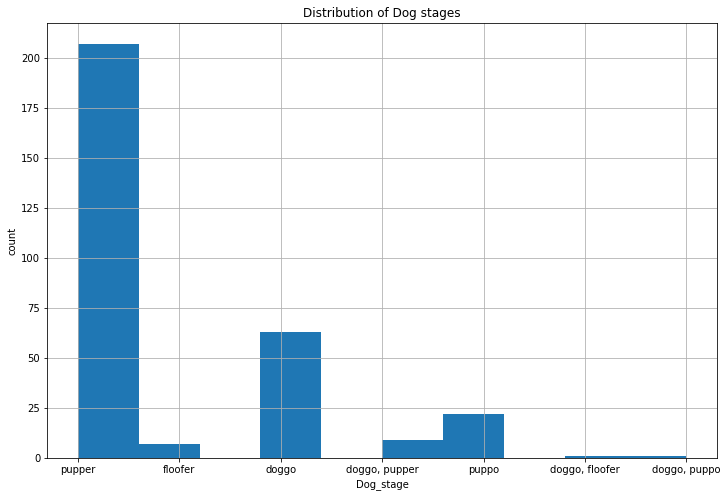

In [83]:
## distribution of dog stages on histogram
merged_df['Dog_stage'].hist(figsize = (12,8))
plt.title('Distribution of Dog stages')
plt.xlabel('Dog_stage')
plt.ylabel('count')


In [97]:
## lets check the image
pupper = merged_df.query('Dog_stage== "pupper"')
pupper.sort_values('Dog_stage',ascending= False).head()

tweet_id                                          jpg_url  \
333   672160042234327040  https://pbs.twimg.com/media/CVP9_beUEAAwURR.jpg   
1117  725786712245440512  https://pbs.twimg.com/media/ChKDKmIWIAIJP_e.jpg   
1018  710117014656950272  https://pbs.twimg.com/media/CdrXp9dWoAAcRfn.jpg   
1029  711008018775851008  https://pbs.twimg.com/media/Cd4CBQFW8AAY3ND.jpg   
1036  711968124745228288  https://pbs.twimg.com/media/CeFrO3qXEAADRbd.jpg   

      img_num              p1   p1_conf  p1_dog                p2   p2_conf  \
333         1             Pug  0.561027    True    French_Bulldog  0.222114   
1117        1            Chow  0.335761    True           Samoyed  0.167173   
1018        2      Toy_Poodle  0.802092    True  Miniature_Poodle  0.111647   
1029        1  French_Bulldog  0.731405    True       Boston_Bull  0.150672   
1036        1        Espresso  0.430135   False        Coffee_Mug  0.418483   

      p2_dog                  p3  ...  p3_dog                 timestamp  \
333     True  Labrador_Retriever  ...    True 2015-12-02 21:06:56+00:00   
1117    True              Kuvasz  ...    True 2016-04-28 20:40:11+00:00   
1018    True      Cocker_Spaniel  ...    True 2016-03-16 14:54:24+00:00   
1029    True                 Pug  ...    True 2016-03-19 01:54:56+00:00   
1036   False                 Cup  ...   False 2016-03-21 17:30:03+00:00   

                                                 source  \
333   <a href="http://twitter.com/download/iphone" r...   
1117  <a href="http://twitter.com/download/iphone" r...   
1018  <a href="http://twitter.com/download/iphone" r...   
1029  <a href="http://twitter.com/download/iphone" r...   
1036  <a href="http://twitter.com/download/iphone" r...   

                                                  tweet rating_numerator  \
333   This is Bubba. He's a Titted Peebles Aorta. Ev...                8   
1117  Say hello to Lillie. She's a Rutabagan Floofem...               11   
1018  This pupper got her hair chalked for her birth...               11   
1029  This is Chuckles. He had a balloon but he acci...               11   
1036  Meet Winston. He's trapped in a cup of coffee....               10   

      rating_denominator      name Dog_stage retweet_count  favorite_count  
333                   10     Bubba    pupper         395.0           918.0  
1117                  10    Lillie    pupper        1527.0          4537.0  
1018                  10      None    pupper        2233.0          5999.0  
1029                  10  Chuckles    pupper         710.0          3275.0  
1036                  10   Winston    pupper        2601.0          8776.0  

[5 rows x 21 columns]

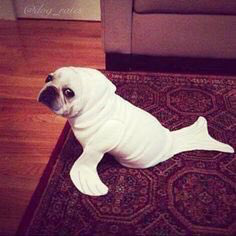

In [98]:
url = merged_df.jpg_url[333]
r = requests.get(url)
Image.open(BytesIO(r.content))

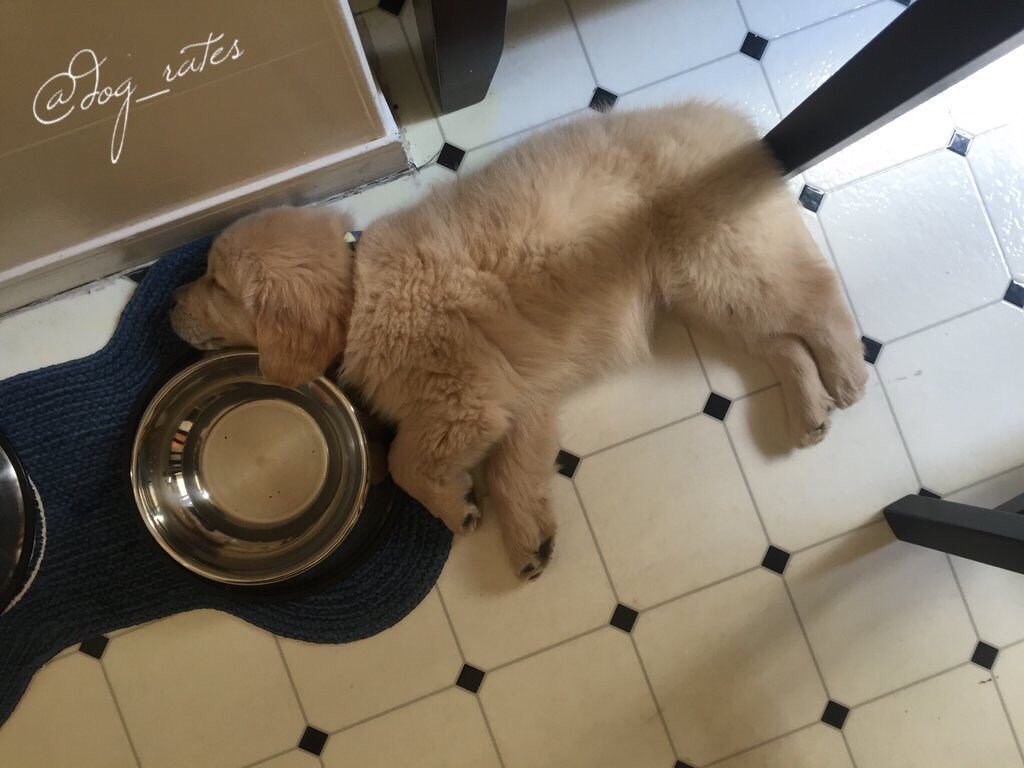

In [99]:
url = merged_df.jpg_url[1117]
r = requests.get(url)
Image.open(BytesIO(r.content))

##### Pupper is the Dog_stage with the highest count

In [85]:
## which of the tweets and images got the most likes or were liked the most.
most_liked = merged_df.sort_values('favorite_count',ascending = False);
most_liked = most_liked[['tweet_id','jpg_url','favorite_count','Dog_stage']]
most_liked.head()


tweet_id                                            jpg_url  \
1690  822872901745569793    https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg   
1221  744234799360020481  https://pbs.twimg.com/ext_tw_video_thumb/74423...   
1950  879415818425184262  https://pbs.twimg.com/ext_tw_video_thumb/87941...   
1599  807106840509214720  https://pbs.twimg.com/ext_tw_video_thumb/80710...   
1898  866450705531457537    https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg   

      favorite_count Dog_stage  
1690        132810.0     puppo  
1221        131075.0     doggo  
1950        107956.0       NaN  
1599        107015.0       NaN  
1898        106827.0    pupper

In [86]:
## least favorite
most_liked.tail()

tweet_id                                          jpg_url  \
1776  837012587749474308  https://pbs.twimg.com/media/C52pYJXWgAA2BEf.jpg   
1942  877611172832227328  https://pbs.twimg.com/media/DCszHgmW0AAmIpT.jpg   
1785  838916489579200512  https://pbs.twimg.com/media/C6RkiQZUsAAM4R4.jpg   
1788  839290600511926273  https://pbs.twimg.com/media/C6XBt9XXEAEEW9U.jpg   
1404  771004394259247104  https://pbs.twimg.com/media/CrMmVqyWcAIDCHI.jpg   

      favorite_count Dog_stage  
1776             0.0       NaN  
1942             0.0    pupper  
1785             0.0       NaN  
1788             0.0    pupper  
1404             NaN    pupper

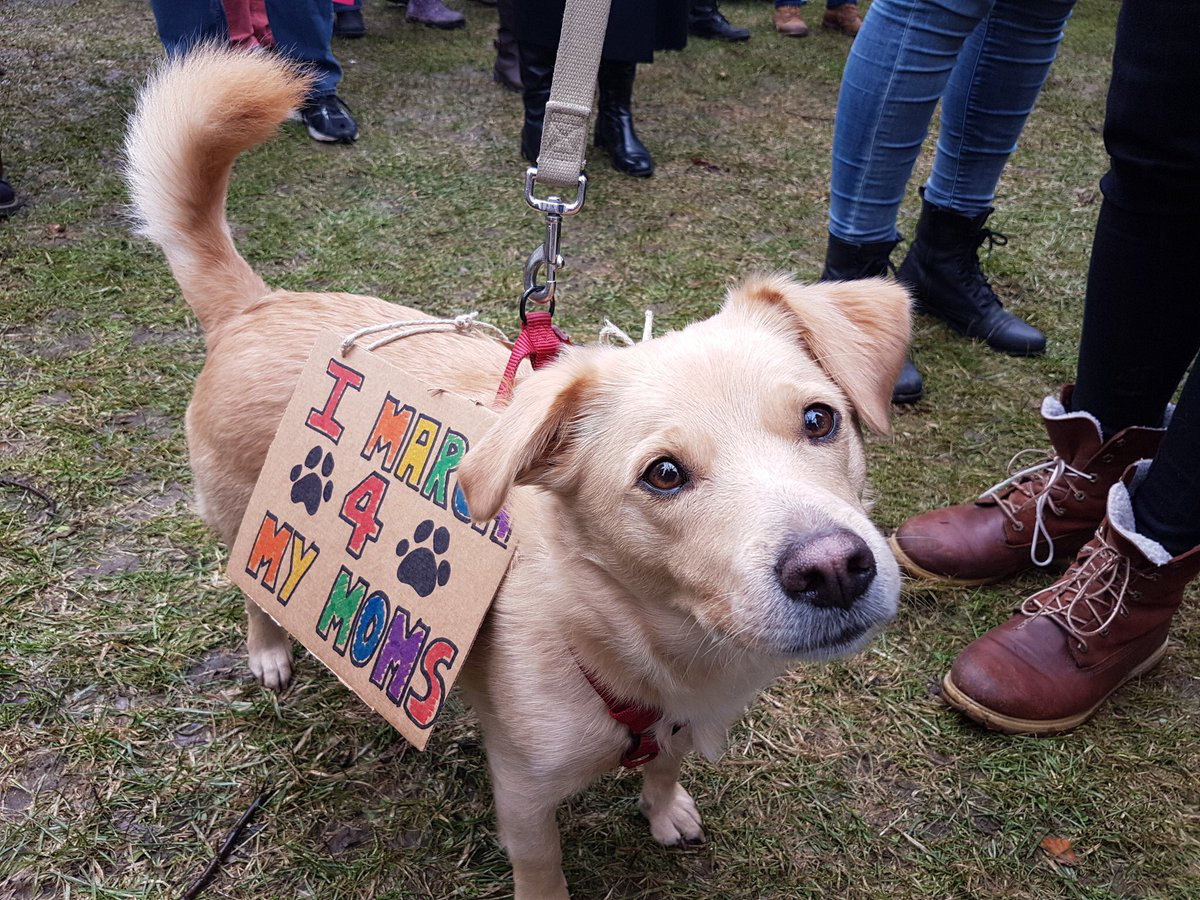

In [89]:
## Lets get to see the image that was liked the most
url = merged_df.jpg_url[1690]
r = requests.get(url)
Image.open(BytesIO(r.content))

##### Image of a dog that had the most favorite likes

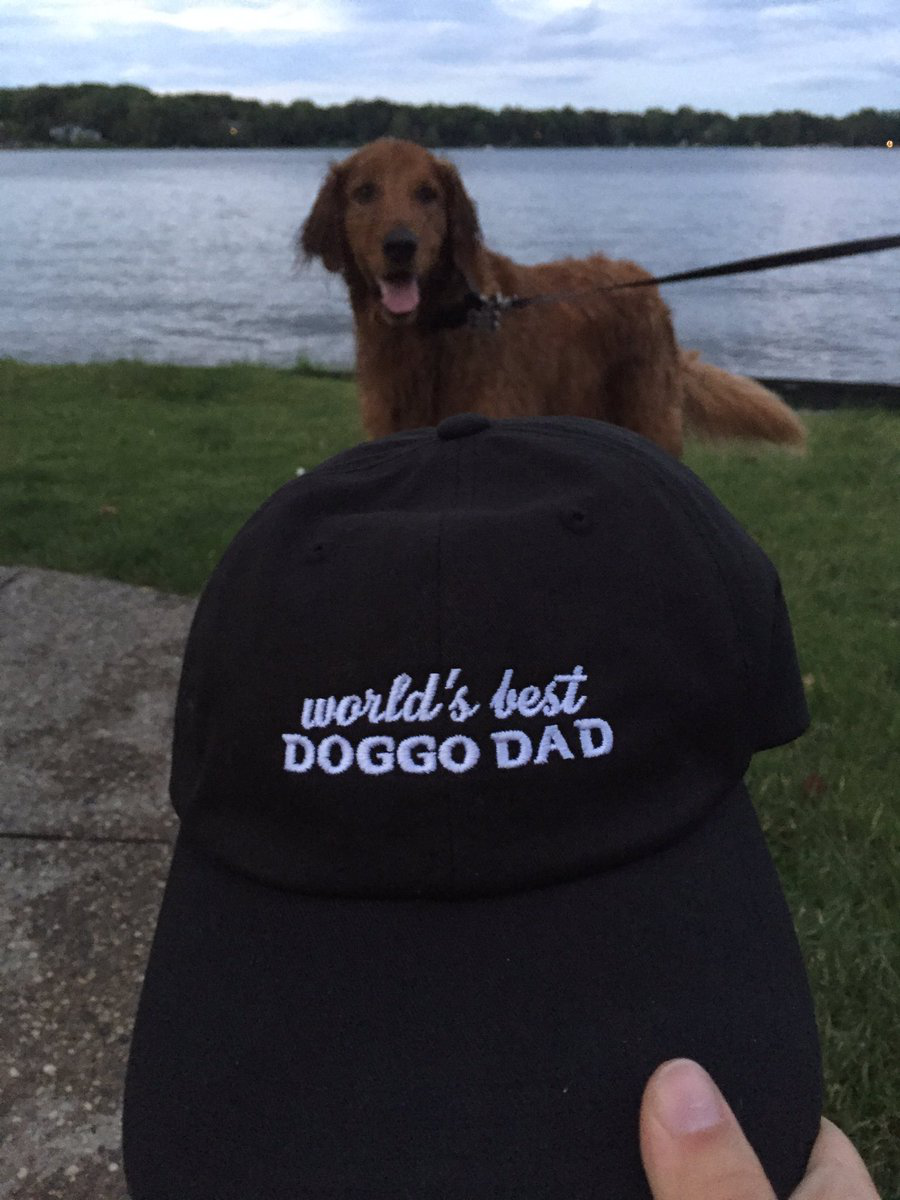

In [91]:
## one of the images that was given 0 favorite count( among least liked)
url = merged_df.jpg_url[1942]
r = requests.get(url)
Image.open(BytesIO(r.content))

Text(0, 0.5, 'Count')

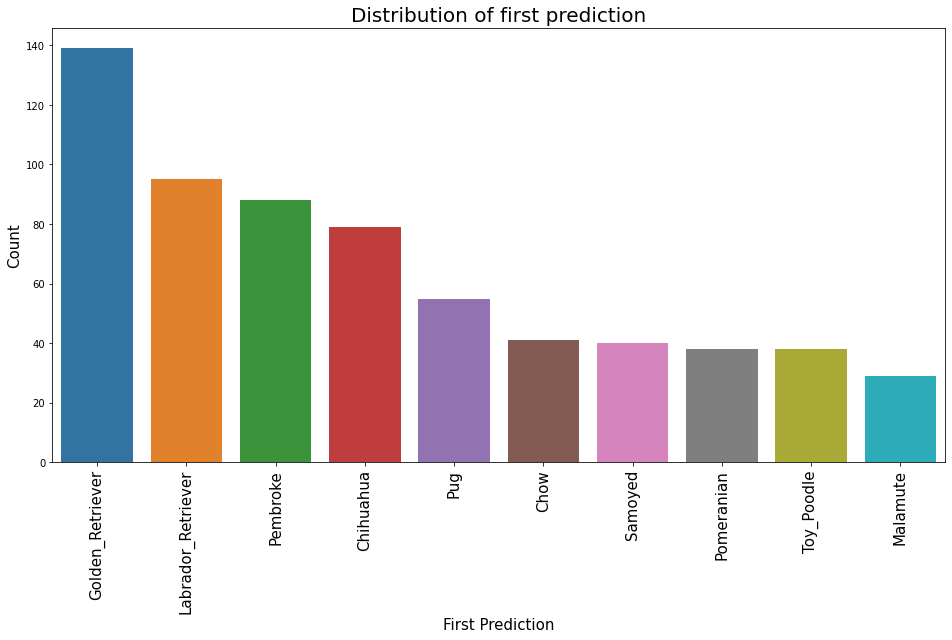

In [94]:
## lets check the p1 predictions
plt.figure(figsize = (16,8))
ax =sns.barplot(x=merged_df['p1'].value_counts()[0:10].index,
               y=merged_df['p1'].value_counts()[0:10],
               data = merged_df);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 15);
plt.title('Distribution of first prediction', fontsize= 20,)
plt.xlabel('First Prediction',fontsize = 15)
plt.ylabel('Count',fontsize =15)

##### first prediction with the highest count is Golden_Retriever

In [95]:
## Extracting data on Golden_Retriever
golden_retriever = merged_df.query('p1 == "Golden_Retriever"')
golden_retriever.sort_values('p1',ascending= False).head()

tweet_id                                          jpg_url  \
10    666063827256086533  https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
1553  796149749086875649  https://pbs.twimg.com/media/Cwx99rpW8AMk_Ie.jpg   
1531  793165685325201412  https://pbs.twimg.com/media/CwHj-jGWAAAnsny.jpg   
1536  793241302385262592  https://pbs.twimg.com/media/CwIougTWcAAMLyq.jpg   
1540  793500921481273345  https://pbs.twimg.com/media/CwMU34YWIAAz1nU.jpg   

      img_num                p1   p1_conf  p1_dog                  p2  \
10          1  Golden_Retriever  0.775930    True     Tibetan_Mastiff   
1553        1  Golden_Retriever  0.600276    True  Labrador_Retriever   
1531        1  Golden_Retriever  0.946224    True  Labrador_Retriever   
1536        1  Golden_Retriever  0.559308    True  Labrador_Retriever   
1540        2  Golden_Retriever  0.326122    True  Labrador_Retriever   

       p2_conf  p2_dog                        p3  ...  p3_dog  \
10    0.093718    True        Labrador_Retriever  ...    True   
1553  0.140798    True                 Seat_Belt  ...   False   
1531  0.036477    True                   Doormat  ...   False   
1536  0.390222    True            Cocker_Spaniel  ...    True   
1540  0.219904    True  Chesapeake_Bay_Retriever  ...    True   

                     timestamp  \
10   2015-11-16 01:22:45+00:00   
1553 2016-11-09 00:37:46+00:00   
1531 2016-10-31 19:00:10+00:00   
1536 2016-11-01 00:00:38+00:00   
1540 2016-11-01 17:12:16+00:00   

                                                 source  \
10    <a href="http://twitter.com/download/iphone" r...   
1553  <a href="http://twitter.com/download/iphone" r...   
1531  <a href="http://twitter.com/download/iphone" r...   
1536  <a href="http://twitter.com/download/iphone" r...   
1540  <a href="http://twitter.com/download/iphone" r...   

                                                  tweet rating_numerator  \
10    This is the happiest dog you will ever see. Ve...               10   
1553  This is Ruby. She just turned on the news. Off...               11   
1531  This is Benji. He's Air Bud. It's a low effort...               12   
1536  This is Tucker. He's out here bustin h*ckin gh...               13   
1540  This is Fiona. She's an extremely mediocre cop...               12   

      rating_denominator    name Dog_stage retweet_count  favorite_count  
10                    10     The       NaN         232.0           496.0  
1553                  10    Ruby       NaN       16628.0         36177.0  
1531                  10   Benji       NaN        3238.0         10478.0  
1536                  10  Tucker       NaN        3812.0         11780.0  
1540                  10   Fiona       NaN        2786.0         11953.0  

[5 rows x 21 columns]

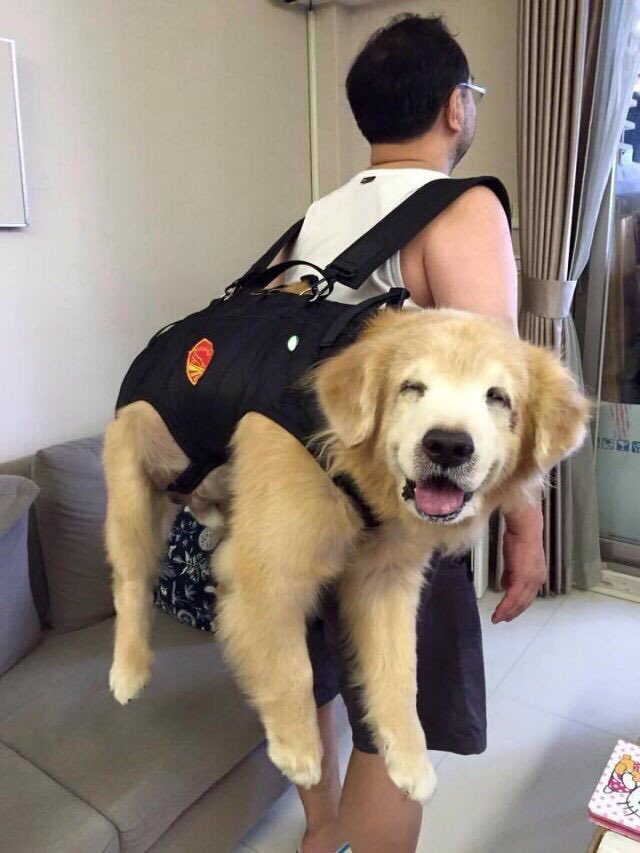

In [96]:
### lets extract an image corresponding to Golden_retriever
url = merged_df.jpg_url[10]
r = requests.get(url)
Image.open(BytesIO(r.content))

##### The image  above is of Golden_Retriever under first prediction.